In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [4]:
#Usually universal date_time standard is provided. In those few cases where it does not, specify your own date parsing function and use the date_parser argument.
def date_parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

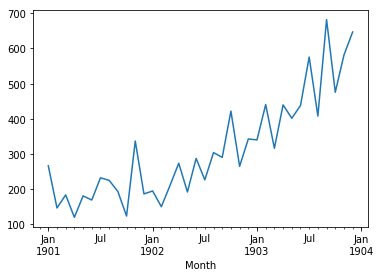

In [5]:
#squeeze=True reads it as series instead of data frame
series = pd.read_csv('./data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=date_parser)
series.plot()
plt.show()

(array([ 5., 10.,  4.,  6.,  0.,  6.,  1.,  0.,  2.,  2.]),
 array([119.3 , 175.57, 231.84, 288.11, 344.38, 400.65, 456.92, 513.19,
        569.46, 625.73, 682.  ]),
 <a list of 10 Patch objects>)

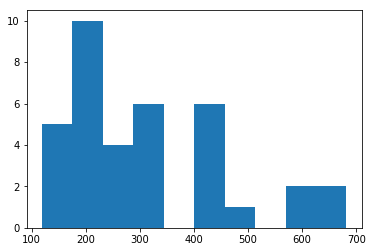

In [8]:
plt.hist(series)

In [11]:
# Create lagged dataset
values = pd.DataFrame(series.values)
series_df = pd.concat([values.shift(1), values], axis=1)
series_df.columns = ['t-1', 't+1']
print(series_df.head(5))

     t-1    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3


In [12]:
# split into train and test sets
X = series_df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [26]:
#naive model 
def naive_model(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = naive_model(x)
    predictions.append(yhat)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)

Test RMSE: 133.156
Test R2: -0.370


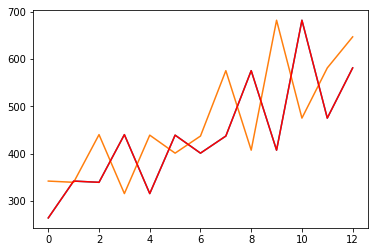

In [22]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [35]:
# Train-test split validation

df = pd.DataFrame(series)
train=df[0:train_size] 
test=df[train_size:]

test.head()

,Sales
Month,
1902-12-01,342.3
1903-01-01,339.7
1903-02-01,440.4
1903-03-01,315.9
1903-04-01,439.3


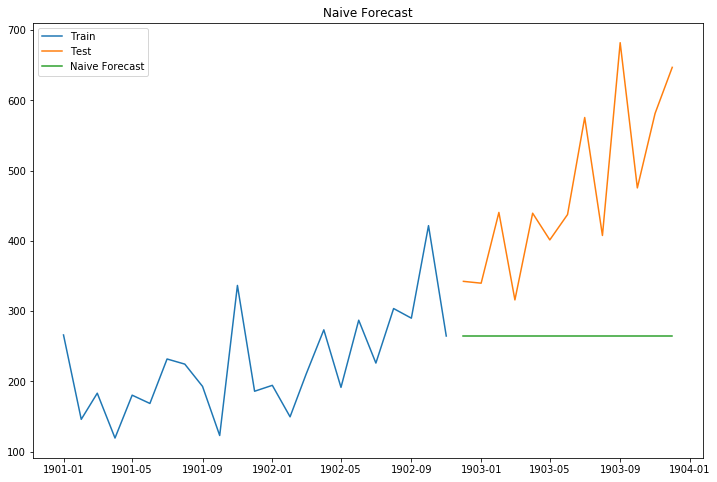

In [36]:
temp= np.asarray(train.Sales)
y_hat = test.copy()
y_hat['naive'] = temp[len(temp)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index,test['Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [37]:
mse = mean_squared_error(test['Sales'], y_hat['naive'])
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)

# Huge difference between walk validation and train-test split validation

Test RMSE: 233.203
Test R2: -0.370


In [ ]:
#mean model

# not useful for this dataset as there is a clear trend

In [ ]:
#drift model

